# Loan Prediction analysis project

In [147]:
# import the libraris

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame
%matplotlib inline

import numpy as np

In [108]:
# load the data

loan_data = pd.read_csv('Desktop/loan_prediction.csv')
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [109]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [110]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [111]:
#find the null values in the data

loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [112]:
#find the frequency distribution of the male and female

loan_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

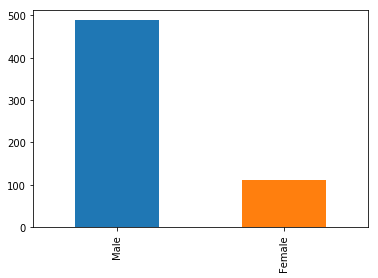

In [67]:
# graphical representiation
loan_data['Gender'].value_counts().plot(kind = 'bar')

In [113]:
#find the frequency distribution of graduates
loan_data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Text(0.5,1,u'Applicants based on Education')

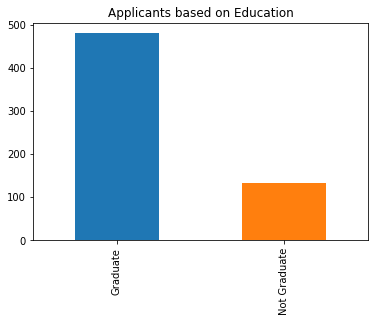

In [114]:
# graphical representation
loan_data['Education'].value_counts().plot(kind = 'bar')
plt.title('Applicants based on Education')

In [115]:
#find the frequency distribution of self employee
loan_data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [71]:
loan_data['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Text(0.5,1,u'Number of applications based on area')

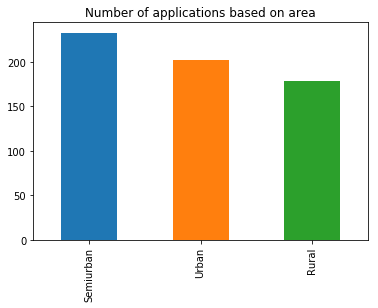

In [116]:
loan_data['Property_Area'].value_counts().plot(kind = 'bar')

plt.title('Number of applications based on area')

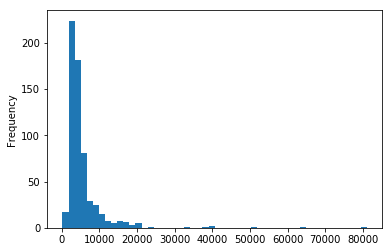

In [117]:
# let us look at the applicants income distribution by plotting

loan_data['ApplicantIncome'].plot(kind = 'hist', bins = 50)

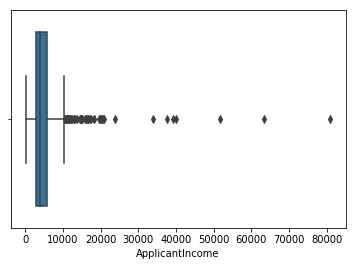

In [74]:
# look using boxplot

sns.boxplot(x = loan_data['ApplicantIncome'])

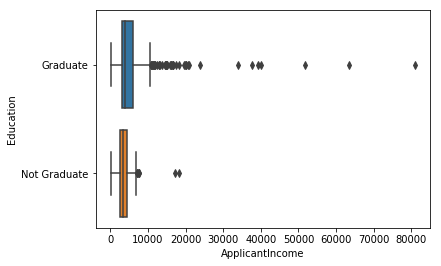

In [118]:
# look into applicants income based on some factors

sns.boxplot(x = loan_data['ApplicantIncome'], y = loan_data['Education'])

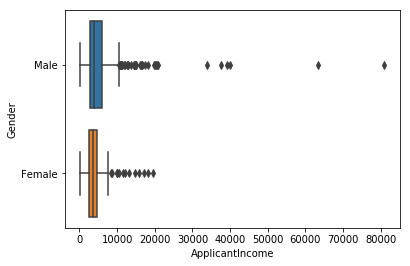

In [119]:
sns.boxplot(x = loan_data['ApplicantIncome'], y = loan_data['Gender'])

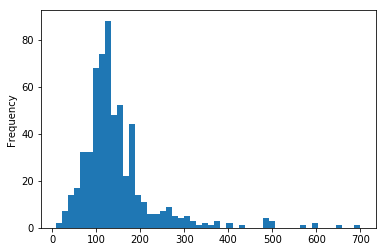

In [77]:
# Now, look at the loan amount

loan_data['LoanAmount'].plot(kind = 'hist',bins = 50)

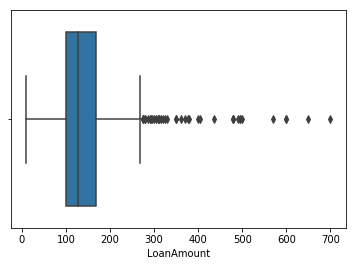

In [49]:
sns.boxplot(x = loan_data['LoanAmount'])

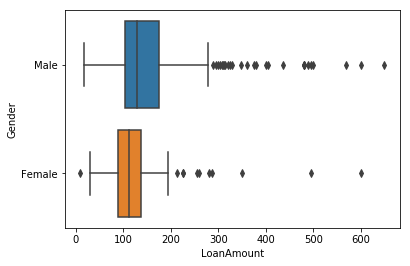

In [78]:
sns.boxplot(x = loan_data['LoanAmount'],y = loan_data['Gender'])

In [79]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [120]:
# fid the probability of laon approve based on credit history
pivot_data = loan_data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
pivot_data

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


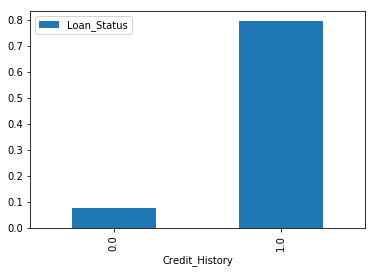

In [121]:
# grpahical representation

pivot_data.plot(kind = 'bar')

In [122]:
# find the probability of loan approve based on marital status

pivot_data2 = loan_data.pivot_table(values='Married',index=['Credit_History'],aggfunc=lambda x: x.map({'Yes':1,'No':0}).mean())
pivot_data2

,Married
Credit_History,
0.0,0.640449
1.0,0.646186


Text(0.5,1,u'Loan Approval based on Marital status')

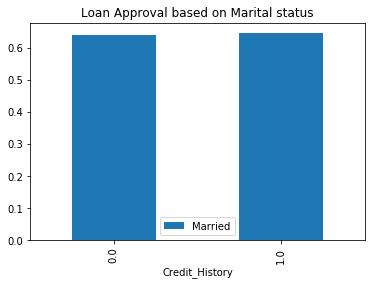

In [123]:
pivot_data2.plot(kind = 'bar')
plt.title('Loan Approval based on Marital status')

####  conclusion based on graph: The marital status did not affect much on the laon approval status as from the graph we can see that the probability is almost same for the single and married people

In [124]:
pivot_data3 = loan_data.pivot_table(values='Self_Employed',index=['Credit_History'],aggfunc=lambda x: x.map({'Yes':1,'No':0}).mean())
pivot_data3

,Self_Employed
Credit_History,
0.0,0.136364
1.0,0.140000


Text(0.5,1,u'Loan Approval based on Employement status')

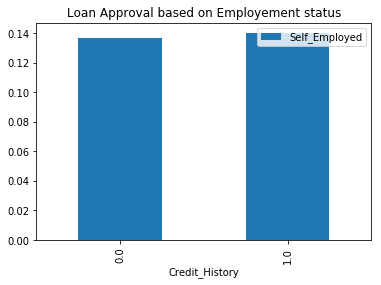

In [125]:
pivot_data3.plot(kind = 'bar')
plt.title('Loan Approval based on Employement status')

In [129]:
pv4 = loan_data.pivot_table(values='Gender',index=['Credit_History'],aggfunc=lambda x: x.map({'Female':1,'Male':0}).mean())
pv4

,Gender
Credit_History,
0.0,0.197674
1.0,0.180258


Text(0.5,1,u'Loan status based on Gender')

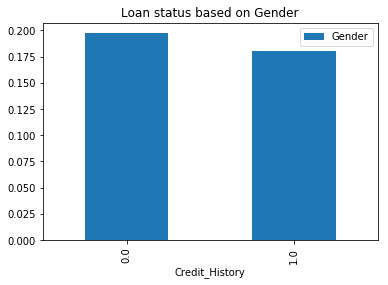

In [132]:
pv4.plot(kind = 'bar')
plt.title('Loan status based on Gender')

#### It seems Men were tend to get approved for the laon then Woman

In [134]:
# Filling missing values


loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [136]:
# fill laon amount


loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].mean(),inplace  = True)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [143]:
loan_data['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [144]:
# since No is almost ~82, we are going to fill the columns missling values with NO
loan_data['Self_Employed'].fillna('No',inplace =True)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

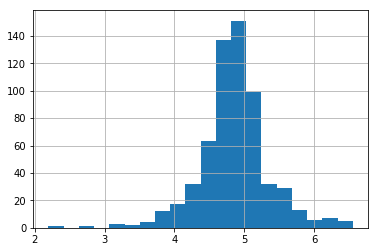

In [148]:
## using log transformation to nullify the extreme values in loan amount

loan_data['LoanAmount_log'] = np.log(loan_data['LoanAmount'])
loan_data['LoanAmount_log'].hist(bins=20)

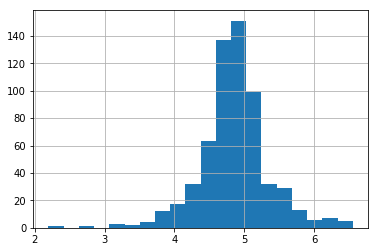

In [152]:
### Adding the income of applicant and its coapplicant to get the better range and nullify the extremities

loan_data['TotalIncome'] = loan_data['ApplicantIncome'] + loan_data['CoapplicantIncome']
loan_data['TotalIncome_log'] = np.log(loan_data['TotalIncome'])
loan_data['LoanAmount_log'].hist(bins=20) 

In [153]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.986426,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [155]:
loan_data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [156]:
# since the percentage of the male is very high, we will fill the data with male

loan_data['Gender'].fillna('Male',inplace = True)

In [157]:
loan_data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [158]:
# since the percentage of the married  is very high, we will fill the data with yes

loan_data['Married'].fillna('Yes',inplace =True)

In [159]:
### filling with mean values of loan_amount_term 
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mean(),inplace =True)

In [161]:
### filling credit history with '1'

loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

In [169]:
## filling with '1' in the loan_status column
loan_data['Loan_Status'].fillna(1, inplace =True)


In [167]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,TotalIncome,TotalIncome_log
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049,4.862066,7024.705081,8.669414
std,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.496575,6458.663872,0.545102
min,150.000000,0.000000,9.000000,12.000000,0.000000,2.197225,1442.000000,7.273786
25%,2877.500000,0.000000,100.250000,360.000000,1.000000,4.607658,4166.000000,8.334712
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000,4.859812,5416.500000,8.597205
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000,5.104426,7521.750000,8.925549
max,81000.000000,41667.000000,700.000000,480.000000,1.000000,6.551080,81000.000000,11.302204


In [170]:
loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64